In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,r2_score,confusion_matrix

In [2]:
covid=pd.read_csv('C:/Users/marve/Vidhyuth/Jupyter/Datasets/Covid Data.csv')
covid.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [5]:
covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [6]:
covid['DEAD'] = [2 if i=='9999-99-99' else 1 for i in covid.DATE_DIED]

In [7]:
for (col,coldata) in covid.iteritems():
    print(col,': ',coldata.unique())

USMER :  [2 1]
MEDICAL_UNIT :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX :  [1 2]
PATIENT_TYPE :  [1 2]
DATE_DIED :  ['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '30/04/2020' '01/05/2020' '02/05/2020' '04/05/2020'
 '05/05/2020' '06/05/2020' '07/05/2020' '09/05/2020' '10/05/2020'
 '11/05/2020' '12/05/2020' '13/05/2020' '14/05/2020' '15/05/2020'
 '16/05/2020' '17/05/2

In [8]:
new_data=covid.drop(['DATE_DIED'],axis=1)
new_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


In [9]:
corr=round(new_data.corr(),3)

<AxesSubplot:>

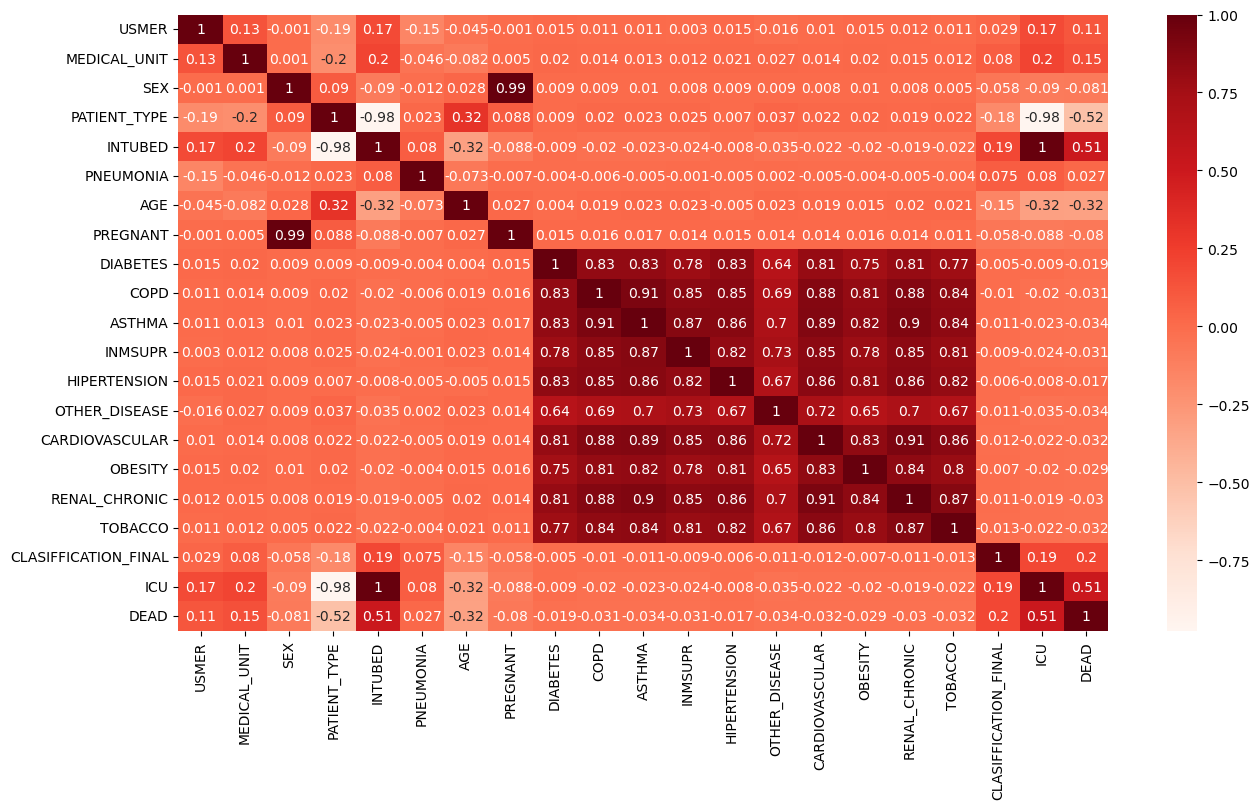

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot = True, cmap = "Reds")

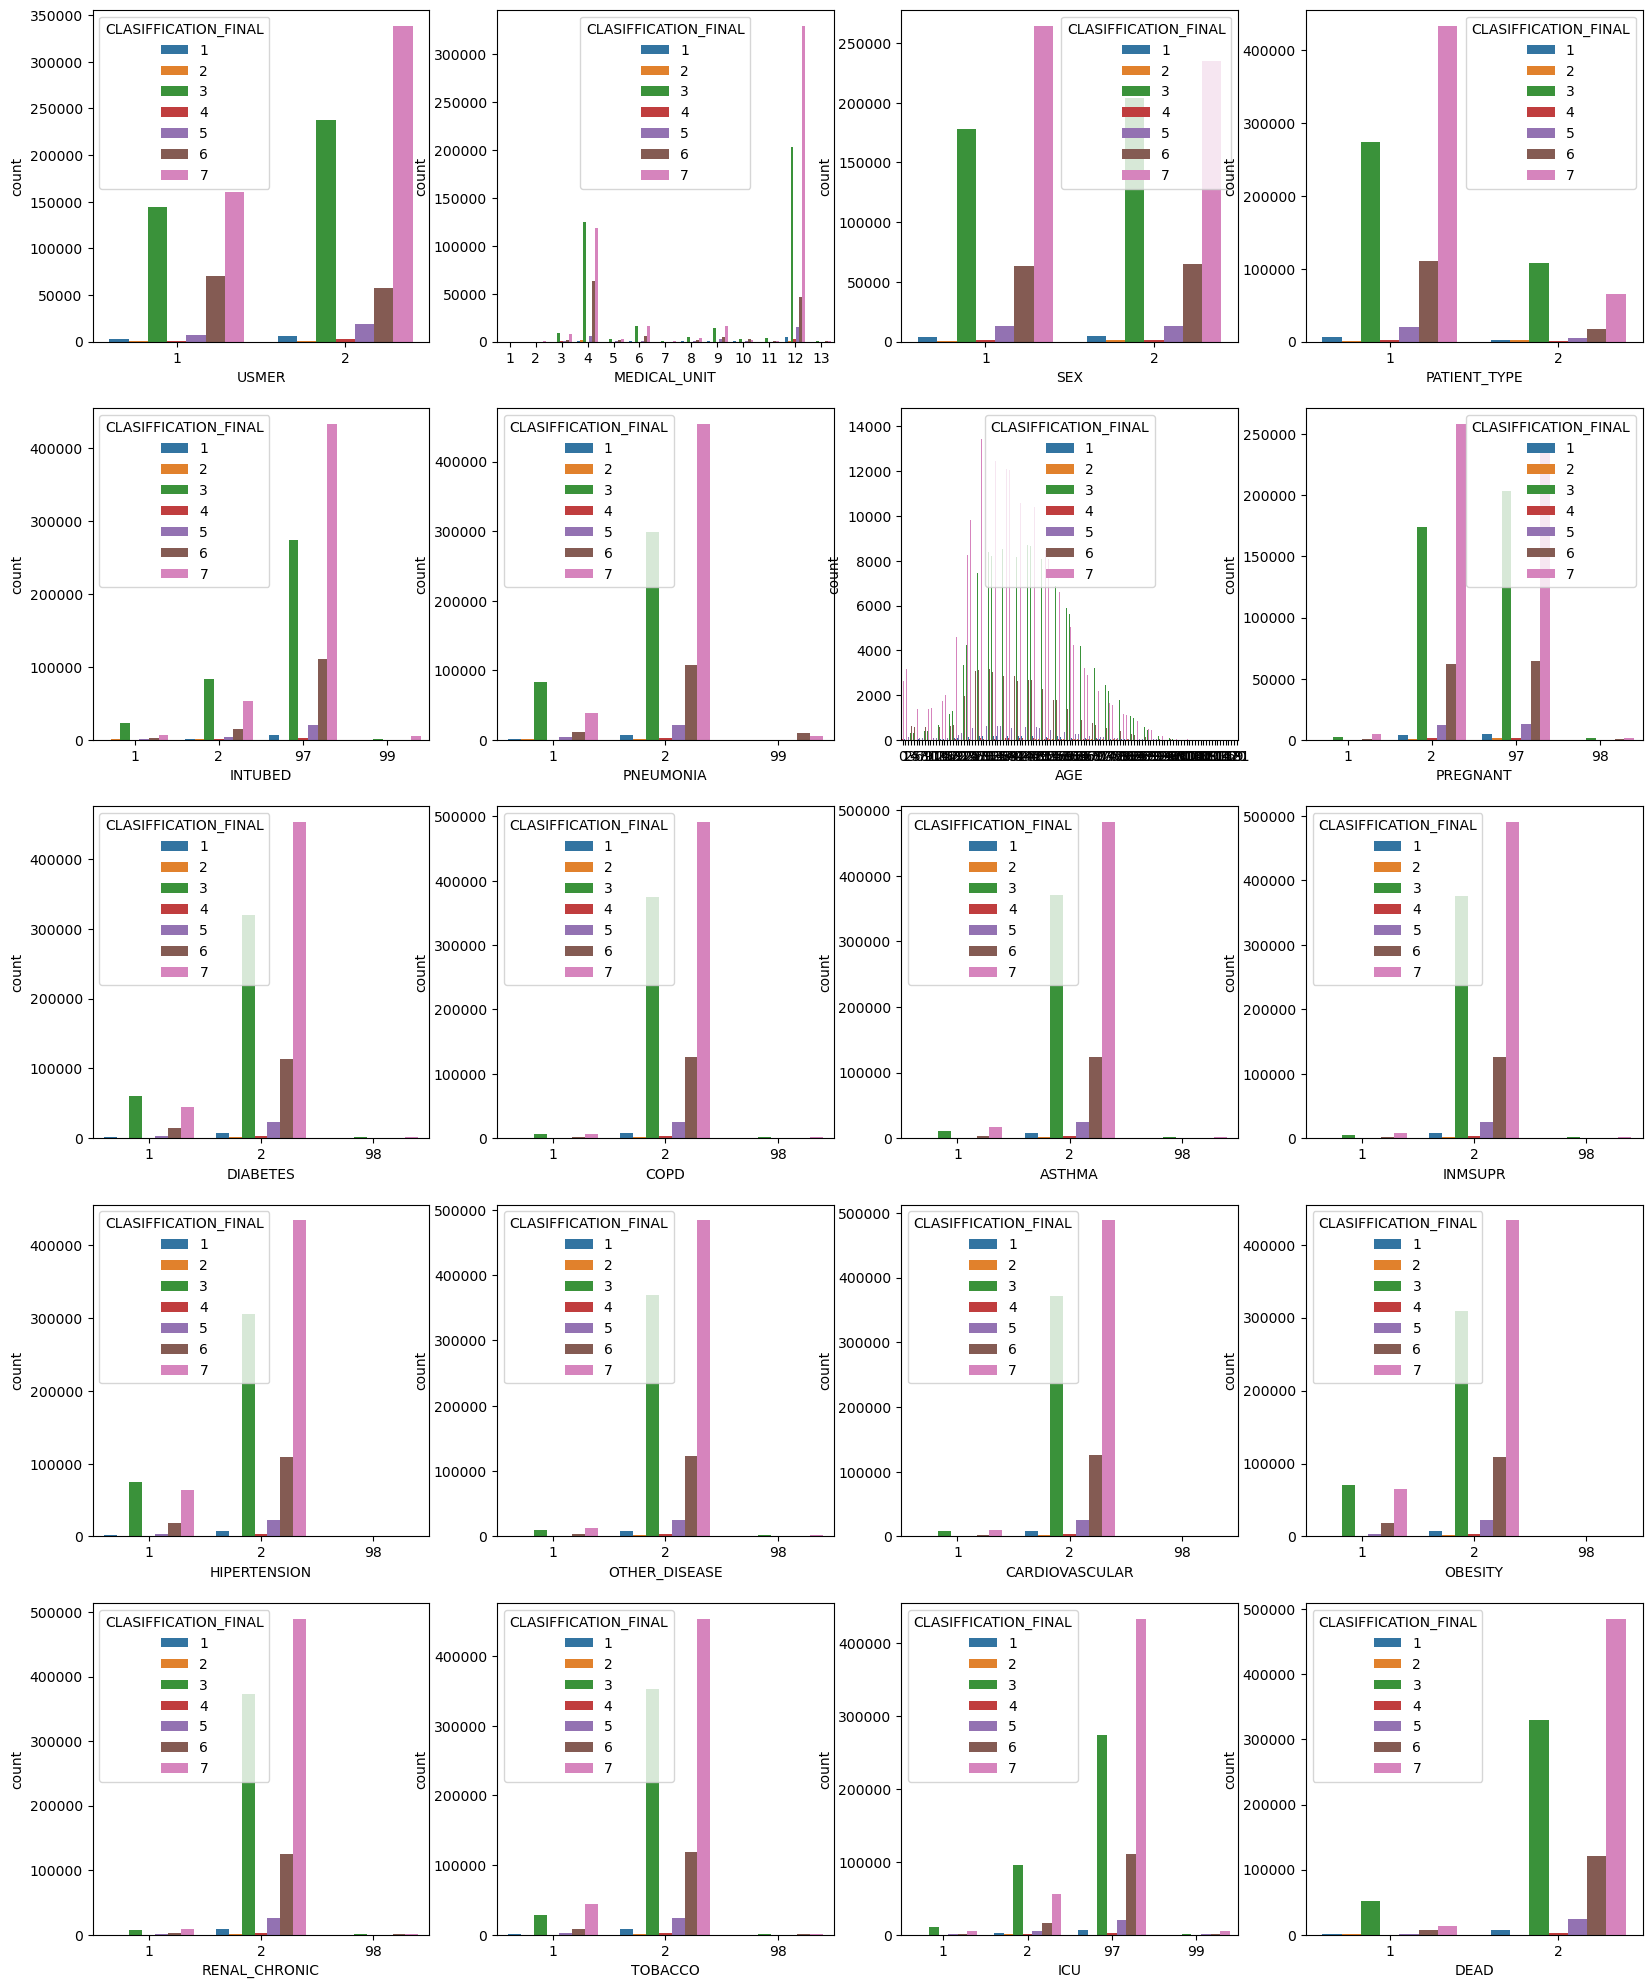

In [11]:
plt.figure(figsize=(20, 25))
index = 1
temp = new_data.drop("CLASIFFICATION_FINAL", axis = 1)

for i in temp.columns:
    plt.subplot(5, 4, index)
    sns.countplot(data=new_data, x=i, hue="CLASIFFICATION_FINAL")
    index += 1
plt.show()

<AxesSubplot:xlabel='AGE', ylabel='count'>

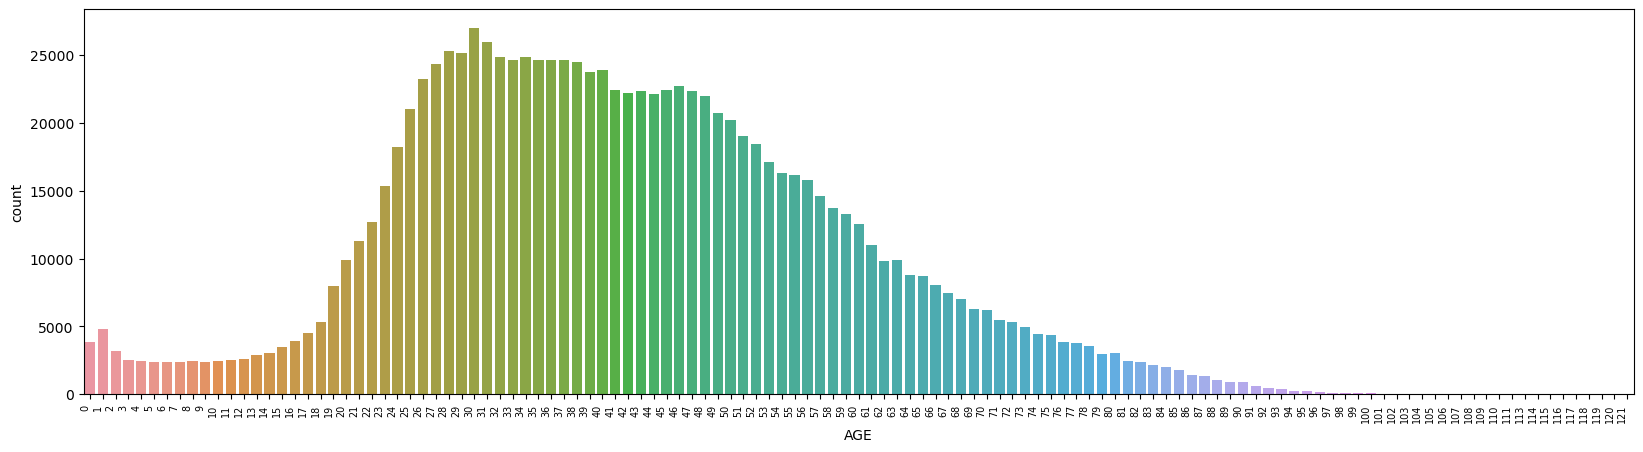

In [12]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90, horizontalalignment='right',fontweight='light',fontsize='x-small' )
sns.countplot(x='AGE', data=new_data)

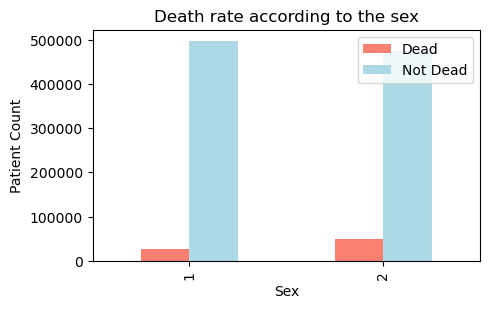

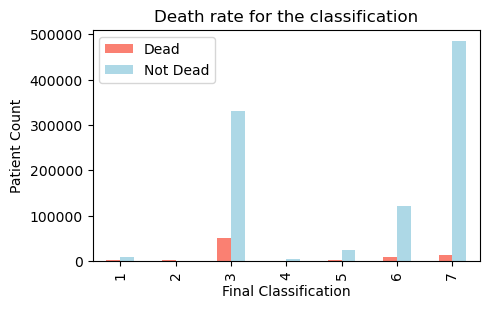

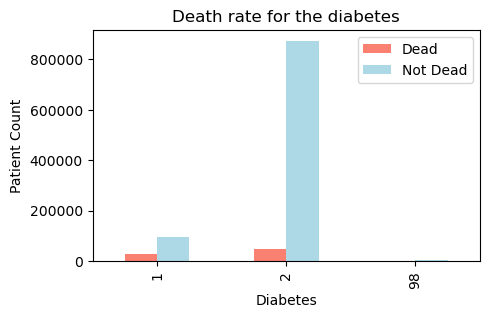

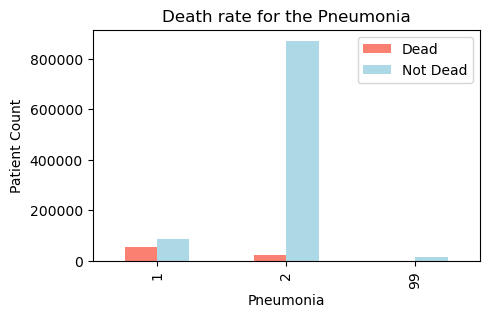

In [13]:
pd.crosstab(new_data.SEX, new_data.DEAD).plot(kind="bar", figsize=(5,3), color=['salmon','lightblue'])
plt.title("Death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"],loc=0)

pd.crosstab(new_data.CLASIFFICATION_FINAL, new_data.DEAD).plot(kind="bar", figsize=(5,3), color=["salmon","lightblue"])
plt.title("Death rate for the classification")
plt.xlabel("Final Classification")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])

pd.crosstab(new_data.DIABETES, new_data.DEAD).plot(kind="bar", figsize=(5,3), color=["salmon","lightblue"])
plt.title("Death rate for the diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])

pd.crosstab(new_data.PNEUMONIA, new_data.DEAD).plot(kind="bar", figsize=(5,3), color=["salmon","lightblue"])
plt.title("Death rate for the Pneumonia")
plt.xlabel("Pneumonia")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])

In [14]:
x =new_data.drop(['DEAD'],axis=1)
y =new_data['DEAD']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=24)

In [18]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Decision Tree Score: ",dt.score(x_test,y_test))
print("Decision Tree F1 Score: ",f1_score(y_test,y_pred,average=None))
print("Decision Tree R2 Score: ",r2_score(y_test,y_pred))

Decision Tree Score:  0.9357923280128937
Decision Tree F1 Score:  [0.56125641 0.9653616 ]
Decision Tree R2 Score:  0.05835778672649217


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 12919  10235]
 [  9963 281456]]


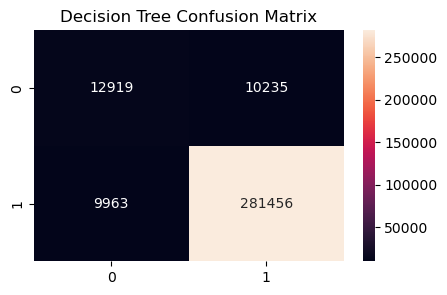

In [20]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [21]:
rf=RandomForestClassifier(n_estimators=4,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Random Forest Score: ",rf.score(x_test,y_test))
print("Random Forest F1 Score: ",f1_score(y_test,rf_pred,average=None))
print("Random Forest R2 Score: ",r2_score(y_test,rf_pred))

Random Forest Score:  0.9391015757868603
Random Forest F1 Score:  [0.57756511 0.96718551]
Random Forest R2 Score:  0.1068897970254189


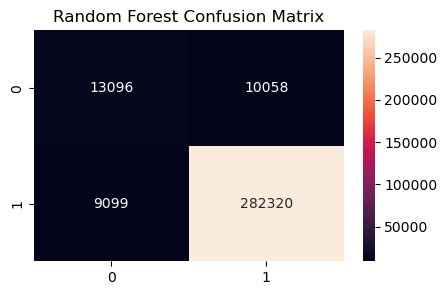

In [22]:
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.title("Random Forest Confusion Matrix")
plt.show()